In [1]:
import keras

import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
from PIL import Image

In [4]:
import matplotlib.pyplot as plt

In [5]:
def test_pattern(size, r_offset, c_offset):
    pattern = np.zeros(shape=(size, size))
    forward = np.arange(0, size)
    backward = forward[::-1].copy()
    row_wrap = lambda arr: (arr + r_offset) % size
    col_wrap = lambda arr: (arr + c_offset) % size
    pattern[row_wrap(forward), col_wrap(forward)] = 1
    pattern[row_wrap(forward), col_wrap(backward)] = 2
    return pattern

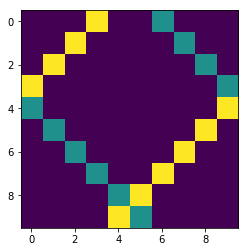

In [6]:
plt.imshow(test_pattern(10, 4, 0))

In [7]:
def blur(pattern, sigma=0.5):
    from scipy.ndimage import gaussian_filter
    return gaussian_filter(pattern, sigma, mode='constant')

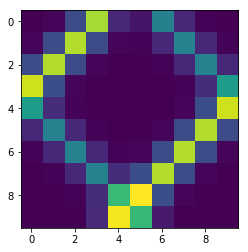

In [8]:
plt.imshow(blur(test_pattern(10, 4, 0)))

In [9]:
batch_size = 1
rows = 10
cols = 10
size = 10
channels = 1

In [10]:
def get_reshaper(batch_size, rows, cols, channels):
    def reshaper(array):
        return array.reshape(batch_size, rows, cols, channels)
    return reshaper

In [11]:
reshaper = get_reshaper(batch_size, rows, cols, channels)

In [12]:
reshaper(test_pattern(size, 0, 0))[..., 0]

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [0., 1., 0., 0., 0., 0., 0., 0., 2., 0.],
        [0., 0., 1., 0., 0., 0., 0., 2., 0., 0.],
        [0., 0., 0., 1., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 1., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 1., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 1., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 1., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]])

In [13]:
def concat_patterns(size, pattern_fn, reshaper):
    offsets = range(size//2 + 1)
    return np.concatenate([reshaper(pattern_fn(size, r, c)) for r in offsets for c in offsets])

In [14]:
training_inputs = concat_patterns(size, test_pattern, reshaper)
blurred_pattern = lambda *args: blur(test_pattern(*args))
training_outputs = concat_patterns(size, blurred_pattern, reshaper)

In [15]:
training_inputs.shape

(36, 10, 10, 1)

In [16]:
training_inputs.shape == training_outputs.shape

True

In [17]:
def imshow_multi(*images, image_slice=...):
    plt.figure(figsize=(120, 40))
    for idx, image in enumerate(images):
        plt.subplot(1, len(images), idx+1)
        plt.imshow(image[image_slice])
    plt.show()

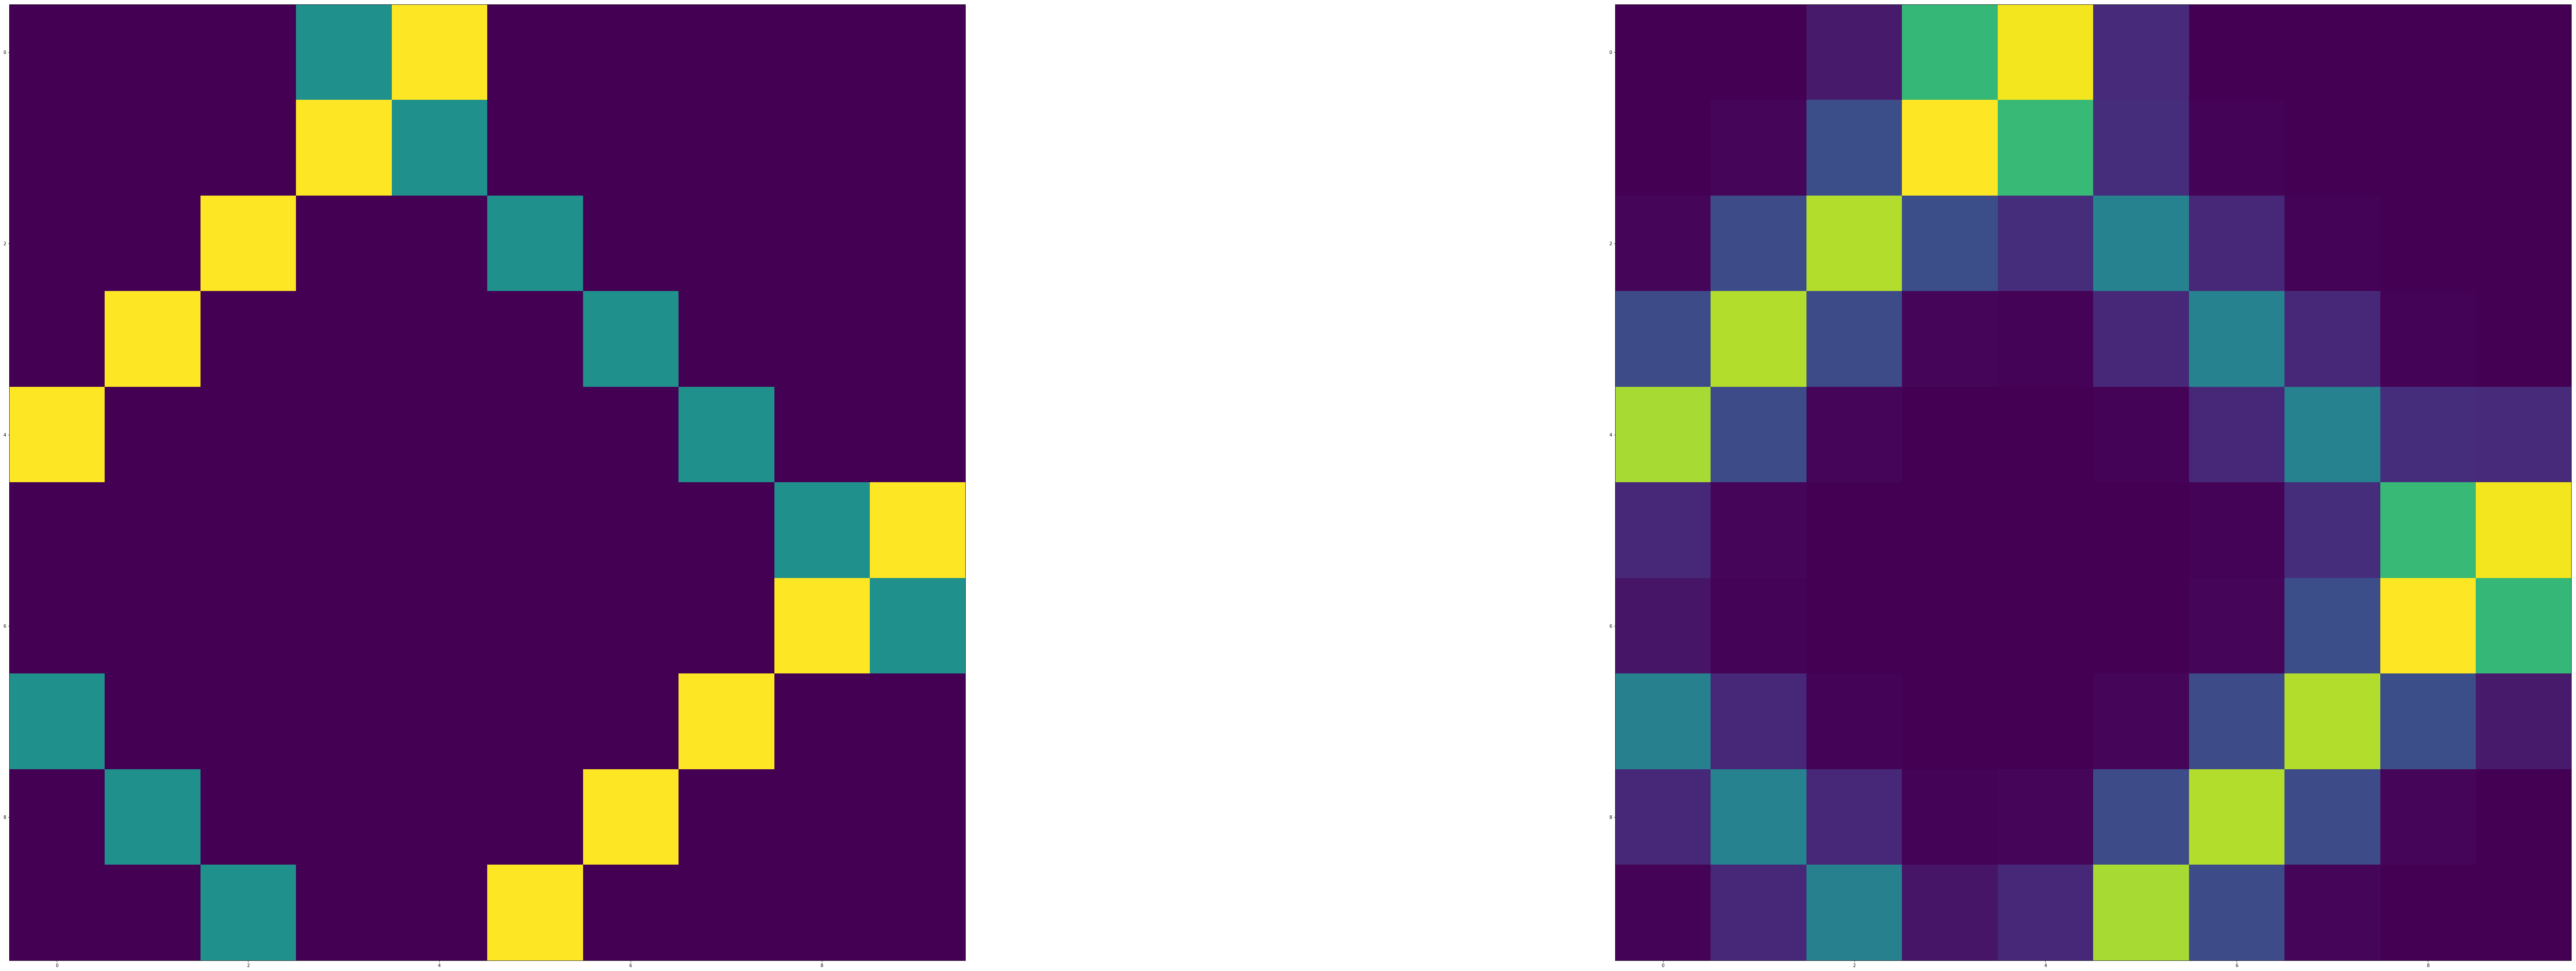

In [18]:
imshow_multi(training_inputs, training_outputs, image_slice=(10, ..., 0))

In [19]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D 

In [20]:
def create_blurring_model (size, channels=1):
    model = Sequential()
    convolution = Conv2D(filters=1, kernel_size=5,
                         padding='same',
                         data_format='channels_last',
                         input_shape=(size, size, channels),
                         name='Convolution'
                        )
    model.add(convolution)
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

In [21]:
model = create_blurring_model(size)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution (Conv2D)         (None, 10, 10, 1)         26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras.utils import plot_model
plot_model(model, to_file='keras.png', show_shapes=True, show_layer_names=True)

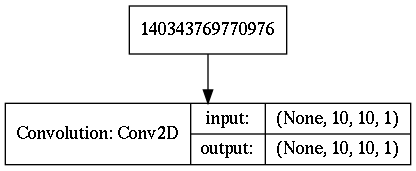

In [23]:
Image.open('keras.png')

In [24]:
initial_outputs = model.predict(training_inputs)

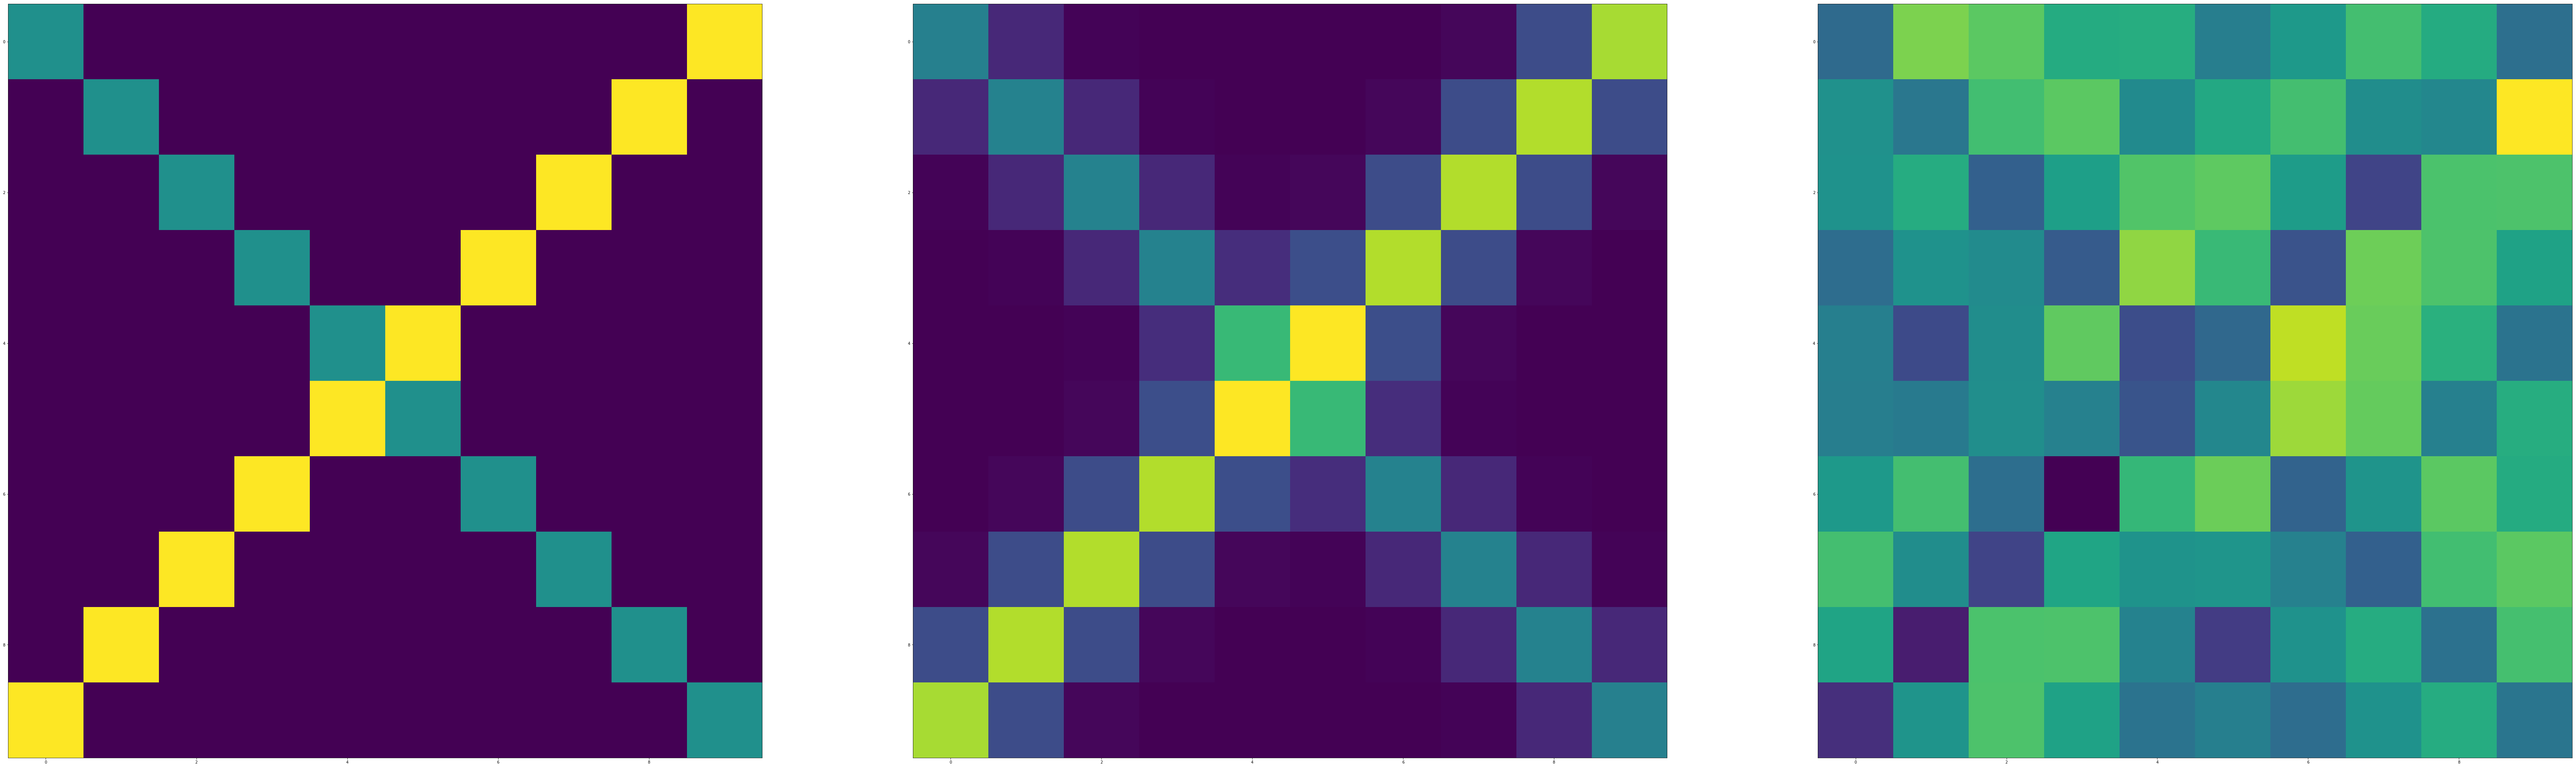

In [25]:
imshow_multi(training_inputs, training_outputs, initial_outputs, image_slice=(0, ..., 0))

In [26]:
model.fit(training_inputs, training_outputs)

Epoch 1/1
36/36 [==============================] - 0s 4ms/step - loss: 0.7278


In [27]:
fitting = model.fit(training_inputs, training_outputs, epochs=1000);

Epoch 1/1000
36/36 [==============================] - 0s 510us/step - loss: 0.6578
Epoch 2/1000
36/36 [==============================] - 0s 299us/step - loss: 0.5978
Epoch 3/1000
36/36 [==============================] - 0s 359us/step - loss: 0.5467
Epoch 4/1000
36/36 [==============================] - 0s 239us/step - loss: 0.5019
Epoch 5/1000
36/36 [==============================] - 0s 354us/step - loss: 0.4631
Epoch 6/1000
36/36 [==============================] - 0s 327us/step - loss: 0.4290
Epoch 7/1000
36/36 [==============================] - 0s 217us/step - loss: 0.3989
Epoch 8/1000
36/36 [==============================] - 0s 384us/step - loss: 0.3722
Epoch 9/1000
36/36 [==============================] - 0s 247us/step - loss: 0.3482
Epoch 10/1000
36/36 [==============================] - 0s 361us/step - loss: 0.3270
Epoch 11/1000
36/36 [==============================] - 0s 151us/step - loss: 0.3078
Epoch 12/1000
36/36 [==============================] - 0s 146us/step - loss: 0.2905
E

36/36 [==============================] - 0s 297us/step - loss: 0.0396
Epoch 99/1000
36/36 [==============================] - 0s 142us/step - loss: 0.0391
Epoch 100/1000
36/36 [==============================] - 0s 177us/step - loss: 0.0387
Epoch 101/1000
36/36 [==============================] - 0s 303us/step - loss: 0.0382
Epoch 102/1000
36/36 [==============================] - 0s 140us/step - loss: 0.0378
Epoch 103/1000
36/36 [==============================] - 0s 240us/step - loss: 0.0374
Epoch 104/1000
36/36 [==============================] - 0s 286us/step - loss: 0.0370
Epoch 105/1000
36/36 [==============================] - 0s 292us/step - loss: 0.0366
Epoch 106/1000
36/36 [==============================] - 0s 186us/step - loss: 0.0362
Epoch 107/1000
36/36 [==============================] - 0s 243us/step - loss: 0.0358
Epoch 108/1000
36/36 [==============================] - 0s 350us/step - loss: 0.0354
Epoch 109/1000
36/36 [==============================] - 0s 279us/step - loss: 0.0

36/36 [==============================] - 0s 206us/step - loss: 0.0188
Epoch 195/1000
36/36 [==============================] - 0s 241us/step - loss: 0.0187
Epoch 196/1000
36/36 [==============================] - 0s 168us/step - loss: 0.0186
Epoch 197/1000
36/36 [==============================] - 0s 147us/step - loss: 0.0185
Epoch 198/1000
36/36 [==============================] - 0s 101us/step - loss: 0.0184
Epoch 199/1000
36/36 [==============================] - 0s 366us/step - loss: 0.0183
Epoch 200/1000
36/36 [==============================] - 0s 276us/step - loss: 0.0182
Epoch 201/1000
36/36 [==============================] - 0s 329us/step - loss: 0.0181
Epoch 202/1000
36/36 [==============================] - 0s 226us/step - loss: 0.0180
Epoch 203/1000
36/36 [==============================] - 0s 235us/step - loss: 0.0179
Epoch 204/1000
36/36 [==============================] - 0s 400us/step - loss: 0.0178
Epoch 205/1000
36/36 [==============================] - 0s 199us/step - loss: 0.

36/36 [==============================] - 0s 135us/step - loss: 0.0124
Epoch 291/1000
36/36 [==============================] - 0s 218us/step - loss: 0.0123
Epoch 292/1000
36/36 [==============================] - 0s 416us/step - loss: 0.0123
Epoch 293/1000
36/36 [==============================] - 0s 288us/step - loss: 0.0122
Epoch 294/1000
36/36 [==============================] - 0s 258us/step - loss: 0.0122
Epoch 295/1000
36/36 [==============================] - 0s 292us/step - loss: 0.0121
Epoch 296/1000
36/36 [==============================] - 0s 603us/step - loss: 0.0121
Epoch 297/1000
36/36 [==============================] - 0s 440us/step - loss: 0.0120
Epoch 298/1000
36/36 [==============================] - 0s 250us/step - loss: 0.0120
Epoch 299/1000
36/36 [==============================] - 0s 219us/step - loss: 0.0119
Epoch 300/1000
36/36 [==============================] - 0s 172us/step - loss: 0.0119
Epoch 301/1000
36/36 [==============================] - 0s 176us/step - loss: 0.

36/36 [==============================] - 0s 150us/step - loss: 0.0088
Epoch 387/1000
36/36 [==============================] - 0s 280us/step - loss: 0.0088
Epoch 388/1000
36/36 [==============================] - 0s 269us/step - loss: 0.0087
Epoch 389/1000
36/36 [==============================] - 0s 158us/step - loss: 0.0087
Epoch 390/1000
36/36 [==============================] - 0s 218us/step - loss: 0.0087
Epoch 391/1000
36/36 [==============================] - 0s 258us/step - loss: 0.0087
Epoch 392/1000
36/36 [==============================] - 0s 175us/step - loss: 0.0086
Epoch 393/1000
36/36 [==============================] - 0s 378us/step - loss: 0.0086
Epoch 394/1000
36/36 [==============================] - 0s 221us/step - loss: 0.0086
Epoch 395/1000
36/36 [==============================] - 0s 199us/step - loss: 0.0085
Epoch 396/1000
36/36 [==============================] - 0s 227us/step - loss: 0.0085
Epoch 397/1000
36/36 [==============================] - 0s 286us/step - loss: 0.

36/36 [==============================] - 0s 478us/step - loss: 0.0065
Epoch 483/1000
36/36 [==============================] - 0s 971us/step - loss: 0.0064
Epoch 484/1000
36/36 [==============================] - 0s 522us/step - loss: 0.0064
Epoch 485/1000
36/36 [==============================] - 0s 510us/step - loss: 0.0064
Epoch 486/1000
36/36 [==============================] - 0s 878us/step - loss: 0.0064
Epoch 487/1000
36/36 [==============================] - 0s 669us/step - loss: 0.0064
Epoch 488/1000
36/36 [==============================] - 0s 980us/step - loss: 0.0063
Epoch 489/1000
36/36 [==============================] - 0s 588us/step - loss: 0.0063
Epoch 490/1000
36/36 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 491/1000
36/36 [==============================] - 0s 781us/step - loss: 0.0063
Epoch 492/1000
36/36 [==============================] - 0s 689us/step - loss: 0.0063
Epoch 493/1000
36/36 [==============================] - 0s 903us/step - loss: 0.00

36/36 [==============================] - 0s 609us/step - loss: 0.0048
Epoch 579/1000
36/36 [==============================] - 0s 448us/step - loss: 0.0048
Epoch 580/1000
36/36 [==============================] - 0s 636us/step - loss: 0.0048
Epoch 581/1000
36/36 [==============================] - 0s 597us/step - loss: 0.0048
Epoch 582/1000
36/36 [==============================] - 0s 558us/step - loss: 0.0048
Epoch 583/1000
36/36 [==============================] - 0s 677us/step - loss: 0.0048
Epoch 584/1000
36/36 [==============================] - 0s 934us/step - loss: 0.0047
Epoch 585/1000
36/36 [==============================] - 0s 608us/step - loss: 0.0047
Epoch 586/1000
36/36 [==============================] - 0s 775us/step - loss: 0.0047
Epoch 587/1000
36/36 [==============================] - 0s 577us/step - loss: 0.0047
Epoch 588/1000
36/36 [==============================] - 0s 589us/step - loss: 0.0047
Epoch 589/1000
36/36 [==============================] - 0s 590us/step - loss: 0.

36/36 [==============================] - 0s 489us/step - loss: 0.0037
Epoch 675/1000
36/36 [==============================] - 0s 739us/step - loss: 0.0036
Epoch 676/1000
36/36 [==============================] - 0s 490us/step - loss: 0.0036
Epoch 677/1000
36/36 [==============================] - 0s 567us/step - loss: 0.0036
Epoch 678/1000
36/36 [==============================] - 0s 578us/step - loss: 0.0036
Epoch 679/1000
36/36 [==============================] - 0s 457us/step - loss: 0.0036
Epoch 680/1000
36/36 [==============================] - 0s 547us/step - loss: 0.0036
Epoch 681/1000
36/36 [==============================] - 0s 902us/step - loss: 0.0036
Epoch 682/1000
36/36 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 683/1000
36/36 [==============================] - 0s 728us/step - loss: 0.0036
Epoch 684/1000
36/36 [==============================] - 0s 994us/step - loss: 0.0035
Epoch 685/1000
36/36 [==============================] - 0s 982us/step - loss: 0.00

36/36 [==============================] - 0s 244us/step - loss: 0.0028
Epoch 771/1000
36/36 [==============================] - 0s 189us/step - loss: 0.0028
Epoch 772/1000
36/36 [==============================] - 0s 257us/step - loss: 0.0028
Epoch 773/1000
36/36 [==============================] - 0s 411us/step - loss: 0.0028
Epoch 774/1000
36/36 [==============================] - 0s 145us/step - loss: 0.0028
Epoch 775/1000
36/36 [==============================] - 0s 279us/step - loss: 0.0028
Epoch 776/1000
36/36 [==============================] - 0s 173us/step - loss: 0.0027
Epoch 777/1000
36/36 [==============================] - 0s 182us/step - loss: 0.0027
Epoch 778/1000
36/36 [==============================] - 0s 137us/step - loss: 0.0027
Epoch 779/1000
36/36 [==============================] - 0s 251us/step - loss: 0.0027
Epoch 780/1000
36/36 [==============================] - 0s 298us/step - loss: 0.0027
Epoch 781/1000
36/36 [==============================] - 0s 191us/step - loss: 0.

36/36 [==============================] - 0s 287us/step - loss: 0.0021
Epoch 867/1000
36/36 [==============================] - 0s 106us/step - loss: 0.0021
Epoch 868/1000
36/36 [==============================] - 0s 177us/step - loss: 0.0021
Epoch 869/1000
36/36 [==============================] - 0s 169us/step - loss: 0.0021
Epoch 870/1000
36/36 [==============================] - 0s 190us/step - loss: 0.0021
Epoch 871/1000
36/36 [==============================] - 0s 169us/step - loss: 0.0021
Epoch 872/1000
36/36 [==============================] - 0s 494us/step - loss: 0.0021
Epoch 873/1000
36/36 [==============================] - 0s 133us/step - loss: 0.0021
Epoch 874/1000
36/36 [==============================] - 0s 394us/step - loss: 0.0021
Epoch 875/1000
36/36 [==============================] - 0s 184us/step - loss: 0.0021
Epoch 876/1000
36/36 [==============================] - 0s 335us/step - loss: 0.0021
Epoch 877/1000
36/36 [==============================] - 0s 228us/step - loss: 0.

36/36 [==============================] - 0s 192us/step - loss: 0.0017
Epoch 963/1000
36/36 [==============================] - 0s 187us/step - loss: 0.0017
Epoch 964/1000
36/36 [==============================] - 0s 142us/step - loss: 0.0017
Epoch 965/1000
36/36 [==============================] - 0s 93us/step - loss: 0.0016
Epoch 966/1000
36/36 [==============================] - 0s 95us/step - loss: 0.0016
Epoch 967/1000
36/36 [==============================] - 0s 187us/step - loss: 0.0016
Epoch 968/1000
36/36 [==============================] - 0s 269us/step - loss: 0.0016
Epoch 969/1000
36/36 [==============================] - 0s 302us/step - loss: 0.0016
Epoch 970/1000
36/36 [==============================] - 0s 283us/step - loss: 0.0016
Epoch 971/1000
36/36 [==============================] - 0s 435us/step - loss: 0.0016
Epoch 972/1000
36/36 [==============================] - 0s 128us/step - loss: 0.0016
Epoch 973/1000
36/36 [==============================] - 0s 408us/step - loss: 0.00

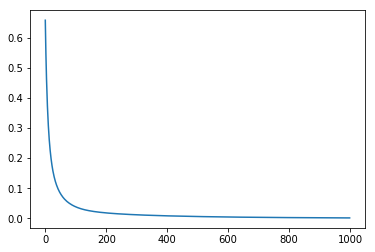

In [28]:
plt.plot(fitting.history['loss'])

In [29]:
final_outputs = model.predict(training_inputs)

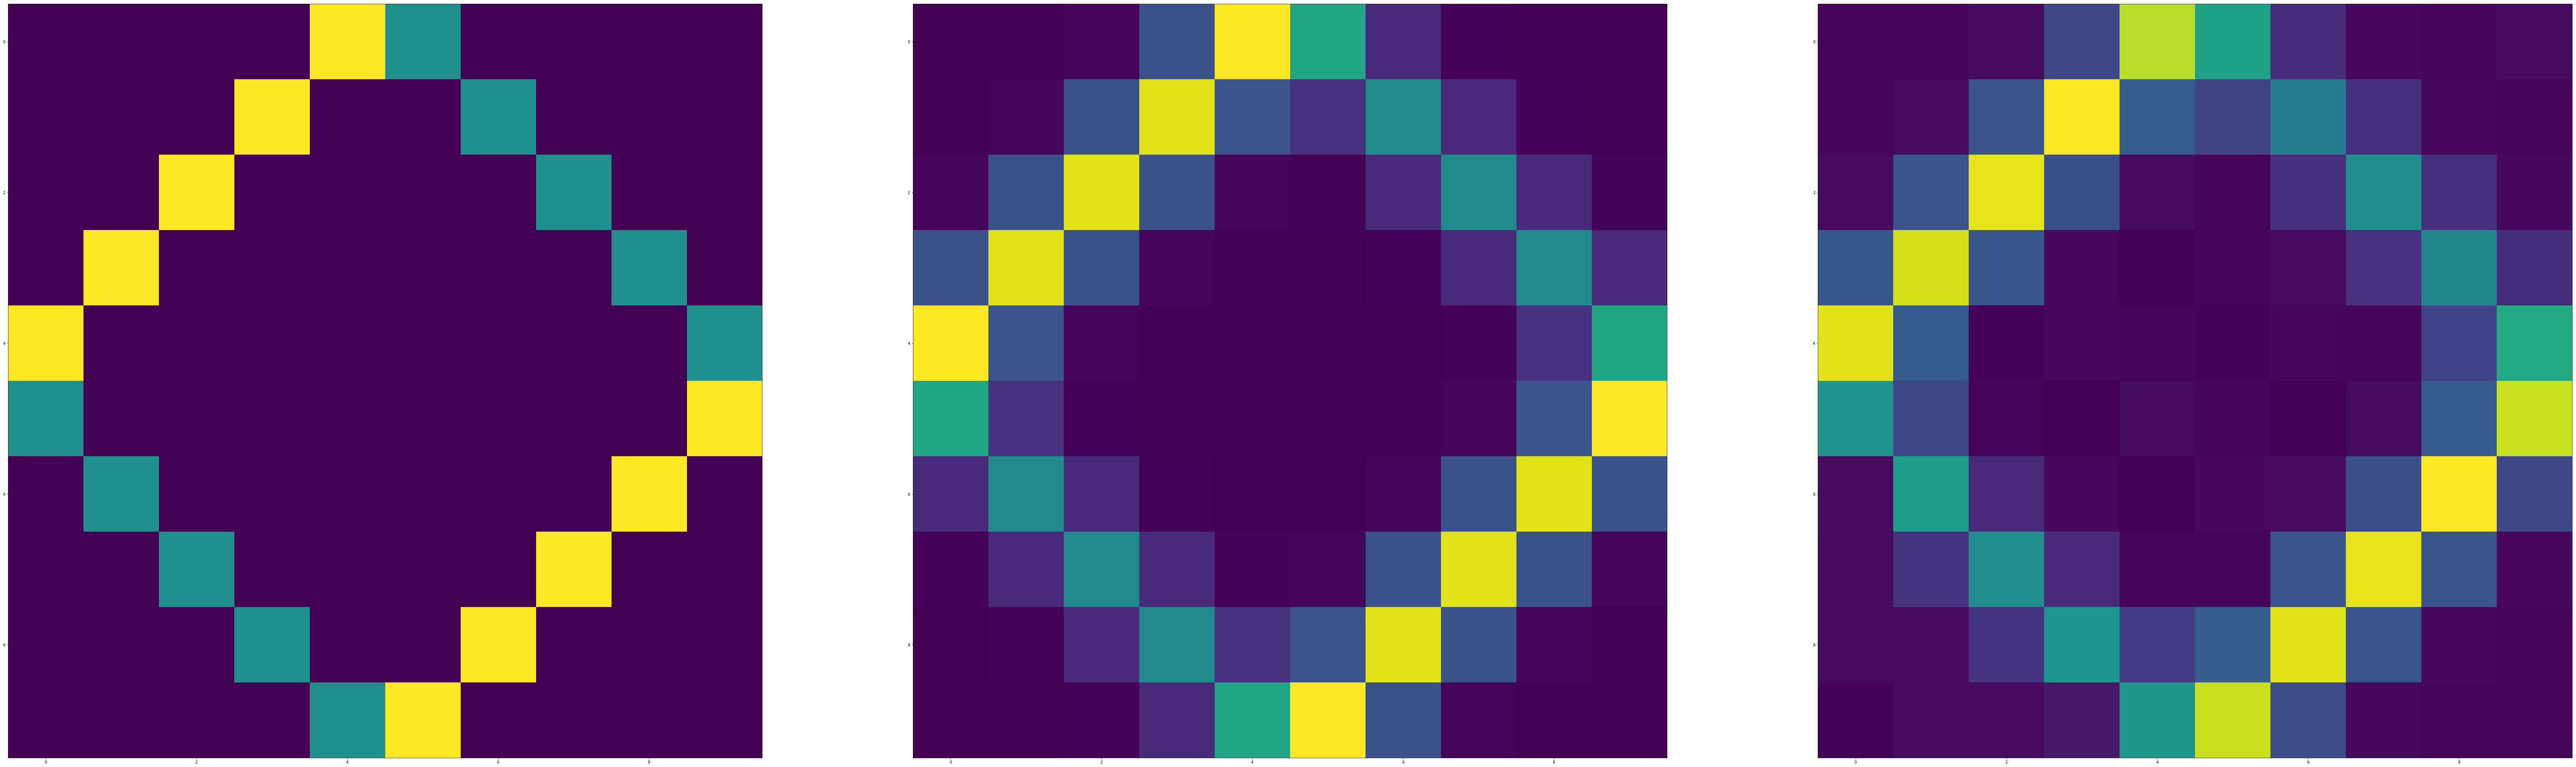

In [30]:
imshow_multi(training_inputs, training_outputs, final_outputs, image_slice=(30, ..., 0))

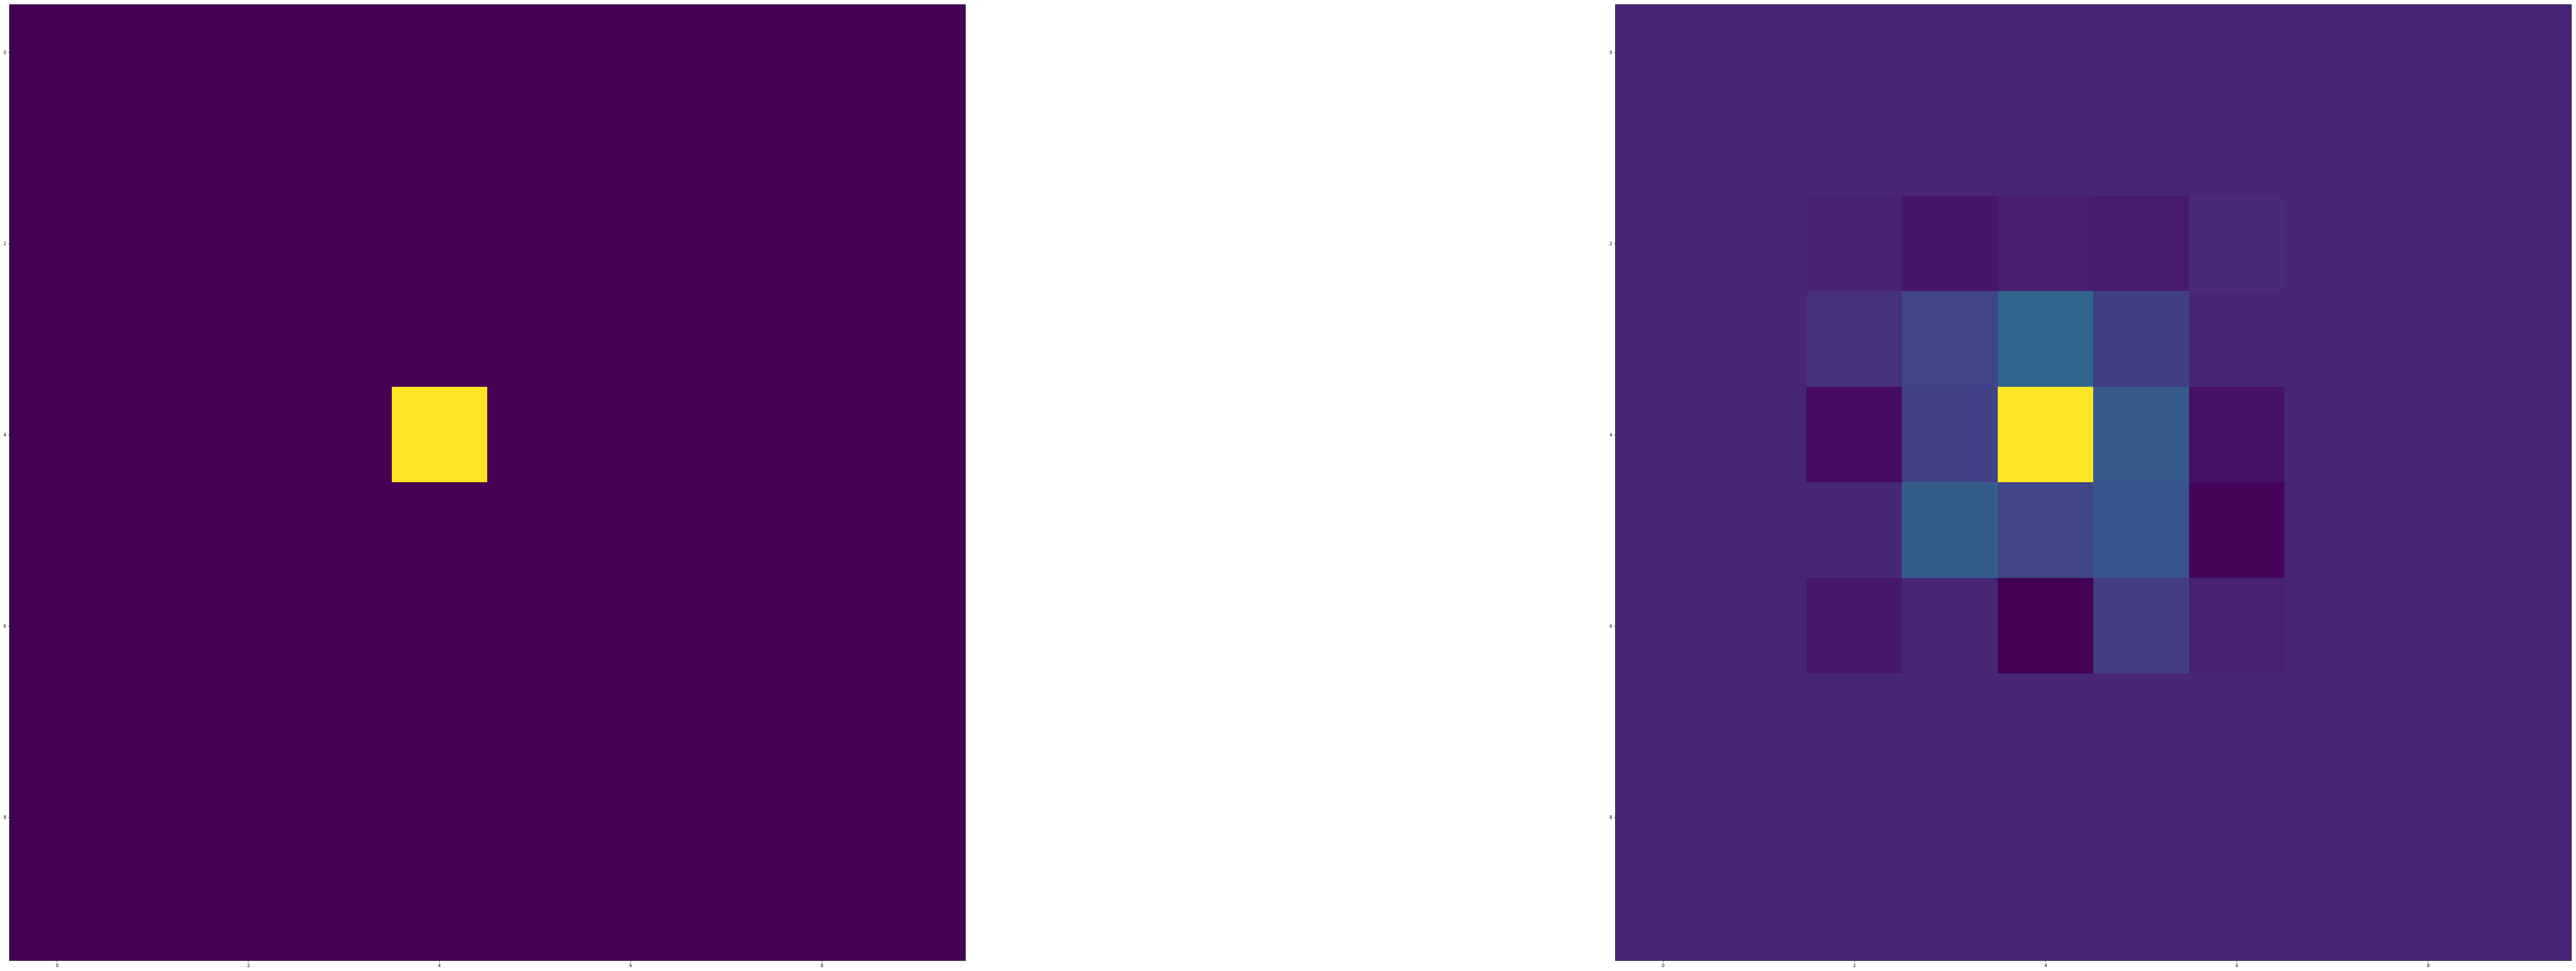

In [31]:
test = np.zeros(shape=(1, size, size, 1))
test[0, 4, 4, 0] = 1
imshow_multi(test, model.predict(test), image_slice=(0, ..., 0))

In [41]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder

In [42]:
def load_mnist():
    X, y = fetch_openml('mnist_784', return_X_y=True)
    X = X.reshape((-1, 28, 28, 1))
    encoder = OneHotEncoder(categories='auto', sparse=False)
    y = encoder.fit_transform(y.reshape((-1, 1)))
    return X, y

In [43]:
X, y = load_mnist()

In [44]:
X.shape

(70000, 28, 28, 1)

In [46]:
y.shape
# 70k obserwacji, kazda 10 cech

(70000, 10)

In [47]:
y[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

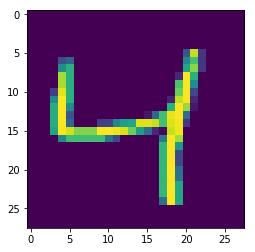

In [49]:
plt.imshow(X[2, ..., 0])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
X_train.shape

(56000, 28, 28, 1)

In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

In [ ]:
def create_mnist_model (X, y):
    _, rows, cols, channels = X.shape
    _, classes_num = y.shape
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(11,11),
                    
                    ))